In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
%matplotlib inline

In [2]:
data = datasets.fetch_openml(
 'mnist_784',
 version=1,
 return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

In [3]:
# Checking the type of pixel_values
print(type(pixel_values))

<class 'pandas.core.frame.DataFrame'>


In [4]:
if not isinstance(pixel_values, np.ndarray):
    pixel_values = pixel_values.values

targets = targets.astype(int)

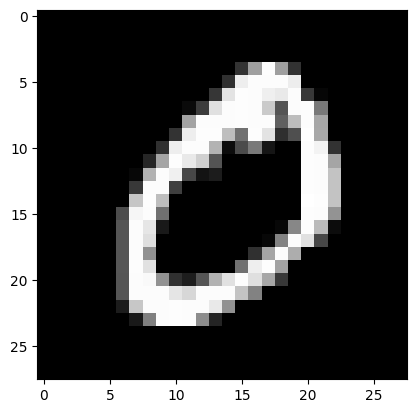

In [5]:
single_image = pixel_values[1, :].reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [6]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [7]:
tsne_df = pd.DataFrame(
np.column_stack((transformed_data, targets[:3000])),
columns=["x", "y", "targets"]
)
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

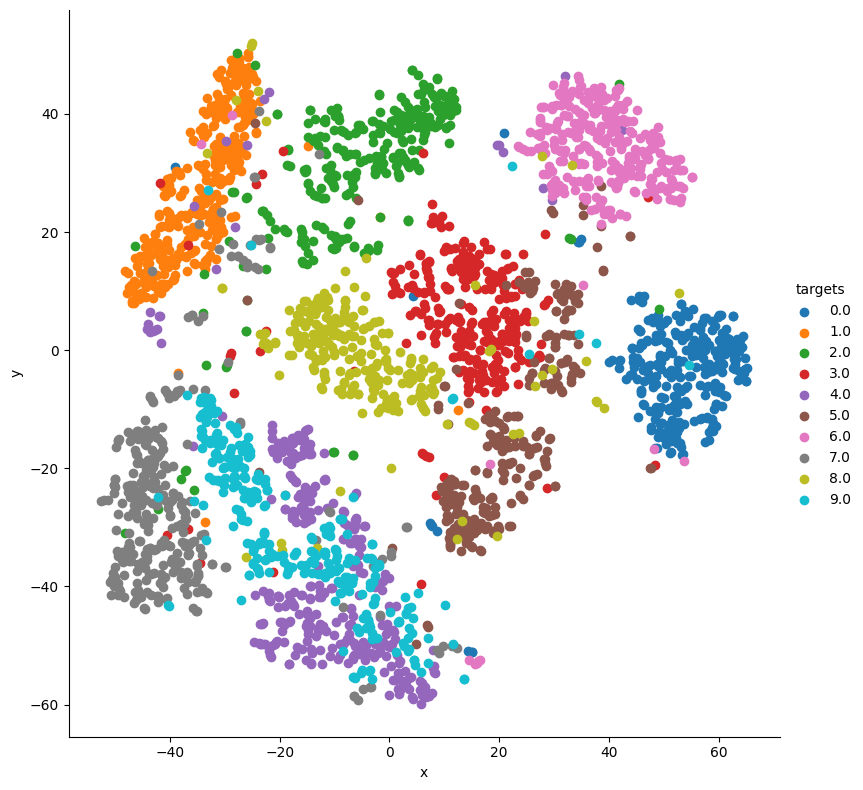

In [9]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
grid.map(plt.scatter, "x", "y").add_legend()